# Data Description
The two datasets provided: players.csv and sessions.csv capture both demographic and behavioural information about players on a Minecraft research server. 
The players.csv dataset contains data on 196 players across 7 variables. The variables are

- Experience (character): The player’s experience level (e.g., Beginner, Amateur, Regular, Veteran, Pro).
- Subscribe (logical): Indicates whether the player is subscribed to a game-related newsletter (e.g., TRUE, FALSE)
- hashedEmail (character): Anonymized identity of the player (e.g., 2e6a0ee9728f7b53e192d)
- played_hours (double): Total hours player spent on the server (e.g., 30.3)
- name (character): Player’s chosen display name (e.g., Freya)
- gender (character): Gender identity of the player (e.g., Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say)
- Age (double): Age of the player in years (e.g., 9).

The sessions.csv dataset contains 1535 individual play sessions with 5 variables. The variables are:

- hasedEmail (character):  Anonymized identity of the player.
- start_time and end_time (character): Local date and time when each session began and ended (format: DD/MM/YYYY HH:MM).
- original_start_time and original_end_time (double): UNIX timestamp representations of the same times, measured in milliseconds since 1970. 

Some Issues Observed 
Some players report extremely high played_hours (223h) which likely reflects server idling rather than active playtime, affecting the average playtime. Also, the majority of the players are young. Older players (45+) are rare and could potentially become statistical outliers. The start_time and end_time variables are untidy since they store two pieces of information (date and time) in one cell. Also, they duplicate the information already available in the original time variables. 


# Questions
Broad Question: What player characteristics and behaviours help the most in predicting if a player will subscribe to a game-related newsletter?

Specific Question: Can player characteristics such as gender, experience level, age and total playtime predict whether a player will subscribe to a newsletter (subscribe)?

The response variable is subscribe. The explanatory variables include experience and played_hours. Finding the relationship 

The respose variable will be subscribe (the variable indicating whether a player subscribed).
The explanatory variable can be experience or gender. By analyzing the relationship between these variables, it can be identified whether more experienced players or players with different genders are more likely to subscribe. Furthermore, this relationship could reveal how player skill or engagement influence their participation in community cativities. In terms of data wrangling, the experience variable will be converted into a categorical variable because it represents distinct, non-numerical levels of skill. The subscribe variable will also be converted into a categorical variable since it represents a binary classification outcome (subscriber vs. non-subscriber). 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [6]:
players <- read_delim(file = "data/players.csv", delim = ",", 
                     col_names = c("experience", "subscribe", "hashedEmail", "played_hours", "name", "gender", "Age"), skip = 1)
sessions <- read_delim(file = "data/sessions.csv", delim = ",",
                    col_names = c("hashedEmail", "start_time", "end_time", "original_start_time", "original_end_time"), skip = 1)
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [19]:
#Minimum Data Wrangling
wrangled_players <- players |>
    mutate(experience = as_factor(experience)) |>
    mutate(subscribe = as_factor(subscribe))
wrangled_sessions <- sessions |>
    select(-start_time, -end_time)

In [16]:
#Mean Value for each Quantitative Variable in the players.csv data set. 
mean_values <- wrangled_players |>
    select(played_hours, Age) |>
    summarize(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE))
mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


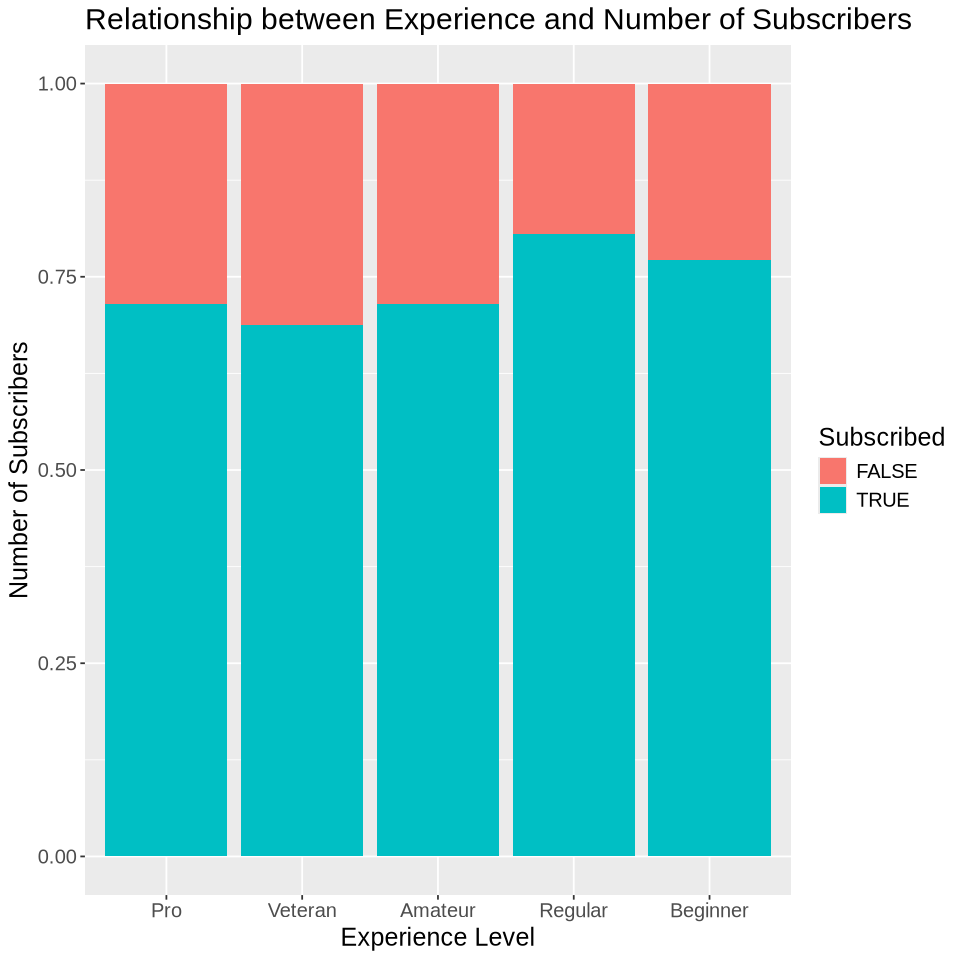

In [37]:
#Visualization 1: Relationship between experience and number of game-related newsletter subscribers
options(repr.plot.width = 8, repr.plot.height = 8)
experience_plot <- wrangled_players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Experience Level", y = "Number of Subscribers", fill = "Subscribed") +
    ggtitle("Relationship between Experience and Number of Subscribers") +
    theme(text = element_text(size = 15))
experience_plot